<a href="https://colab.research.google.com/github/agayatri123/Tugas-Akhir-Rekomendasi/blob/main/Recommendation_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Anindita Gayatri
**Email:agayatri123@yahoo.co.id
**ID Dicoding:anindita_gayatri_ukA6

# **System Recommendation: Recommendation Books**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# load the dataset
data_book= pd.read_csv('sample_data/best_books_ever.csv')

Pada tahap ini dibangun environment yang sesuai untuk data dan pengolahan nya dengan mengimport panda, numpy, matplotlib dan seaborn. Setelah nya dimasukkan dataset berbentuk csv yang telah di-download dari Kaggle yaitu https://www.kaggle.com/datasets/thedevastator/comprehensive-literary-greats-dataset

# **Data Understanding**

In [3]:
# Melihat summary dari struktur data_goodreads
data_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [4]:
# Data dimension
print("Best Books Ever:", data_book)

Best Books Ever:                                             bookId  \
0                         2767052-the-hunger-games   
1      2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                       2657.To_Kill_a_Mockingbird   
3                         1885.Pride_and_Prejudice   
4                                   41865.Twilight   
...                                            ...   
52473                           11492014-fractured   
52474                             11836711-anasazi   
52475                              10815662-marked   
52476                         11330278-wayward-son   
52477                 10991547-daughter-of-helaman   

                                           title                 series  \
0                               The Hunger Games    The Hunger Games #1   
1      Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                          To Kill a Mockingbird  To Kill a Mockingbird   
3                            Pride

In [5]:
# Melihat kolom mana saja yang Numeric
num_col=[]
for col in data_book.columns:
    if(data_book[col].dtypes!='object'):
        num_col.append(col)
        #print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

['rating', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes']


In [6]:
# Melihat kolom mana saja yang Categorical
cat_col=[]
for col in data_book.columns:
    if(data_book[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 20 categorical columns in dataset
['bookId', 'title', 'series', 'author', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'ratingsByStars', 'setting', 'coverImg', 'price']


Pada DATA UNDERSTANDING diketahui kondisi & status data lain nya sbb :
1) Kondisi Data
- Total Baris Data: 52,478 entries
- Memori yang Digunakan: 10.0+ MB

2) Status Missing Values:
- series: 29,008 missing values (23470 non-null dari 52,478)
- description: 1,338 missing values (51,140 non-null dari 52,478)
- language: 3,806 missing values (48,672 non-null dari 52,478)
- bookFormat: 1,473 missing values (51,005 non-null dari 52,478)
- edition: 47,523 missing values (4,955 non-null dari 52,478)
- pages: 2,347 missing values (50,131 non-null dari 52,478)
- publisher: 3,696 missing values (48,782 non-null dari 52,478)
- publishDate: 880 missing values (51,598 non-null dari 52,478)
- firstPublishDate: 21,326 missing values (31,152 non-null dari 52,478
- likedPercent: 622 missing values (51,856 non-null dari 52,478)
- coverImg: 605 missing values (51,873 non-null dari 52,478)
- price: 14,365 missing values (38,113 non-null dari 52,478)
- Kolom lainnya terisi lengkap
  
3) Variabel atau Fitur pada Dataset (dari 20 column yang tersisa setelah data "dibersihkan" diambil fitur data yang penting sbb:
- bookId: Nomor buku di perpustakaan (type: object)
- title: Judul Buku (type: object)
- series: Serial dari buku, bila ada (type: object)
- author: Pengarang Buku (type: object)
- rating: penilaian pembaca tentang kualitas buku antara 1-5 (type: int64)
- descriptian: penjelasan singkat isi buku (type: object)
- language: Bahasa yang dipakai oleh penulis (type: object) - dst

# **Data Cleaning & Preprocessing**

In [7]:
# Cek missing value dengan fungsi isnull()
data_book.isnull().sum()

,0
bookId,0
title,0
series,29008
author,0
rating,0
description,1338
language,3806
isbn,0
genres,0
characters,0


In [8]:
# Membersihkan missing value dengan fungsi dropna()
data_book1 = data_book.dropna()
data_book1

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,6/21/2003,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9.78035E+12,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,10/20/1955,[],110146,"['78217', '22857', '6628', '1477', '967']",98.0,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15
29,375802.Ender_s_Game,Ender's Game,Ender's Saga #1,"Orson Scott Card, Stefan Rudnicki (Narrator), ...",4.30,"Andrew ""Ender"" Wiggin thinks he is playing com...",English,9.78081E+12,"['Science Fiction', 'Fiction', 'Young Adult', ...","['Dink', 'Bernard', 'Valentine Wiggin', 'Peter...",...,10/28/1985,"['Hugo Award for Best Novel (1986)', 'Nebula A...",1131303,"['603209', '339819', '132305', '35667', '20303']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,720651,7515,4.6
37,17245.Dracula,Dracula,Dracula #1,"Bram Stoker, Nina Auerbach (Editor), David J. ...",4.00,You can find an alternative cover edition for ...,English,9.78039E+12,"['Classics', 'Horror', 'Fiction', 'Fantasy', '...","['Jonathan Harker', 'Lucy Westenra', 'Abraham ...",...,5/26/1997,[],938325,"['345260', '329217', '197206', '48642', '18000']",93.0,"['Transylvania (Romania)', 'Budapest (Hungary)...",https://i.gr-assets.com/images/S/compressed.ph...,646782,6988,4.55
42,28187.The_Lightning_Thief,The Lightning Thief,Percy Jackson and the Olympians #1,Rick Riordan (Goodreads Author),4.26,Alternate cover for this ISBN can be found her...,English,9.78079E+12,"['Fantasy', 'Young Adult', 'Mythology', 'Ficti...","['Annabeth Chase', 'Grover Underwood', 'Luke C...",...,6/28/2005,"[""Young Readers' Choice Award (2008)"", 'Books ...",1992300,"['1006885', '604999', '289310', '64014', '27092']",95.0,"['New York City, New York (United States)', 'M...",https://i.gr-assets.com/images/S/compressed.ph...,597132,6370,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52135,28637637-a-lady-unrivaled,A Lady Unrivaled,Ladies of the Manor #3,Roseanna M. White (Goodreads Author),4.33,Lady Ella Myerston can always find a reason to...,English,9.78076E+12,"['Historical Fiction', 'Christian Fiction', 'R...","['Ella Myerston', 'James Azerly', 'Susan Azerl...",...,September 1st 2016,[],1824,"['893', '677', '215', '32', '7']",98.0,"['Cotswolds, England']",https://i.gr-assets.com/images/S/compressed.ph...,8,1,6.42
52179,458341.Courtney_Crumrin_and_the_Night_Things,Courtney Crumrin and the Night Things,Courtney Crumrin #1,"Ted Naifeh (Goodreads Author), Kalah Allen (De...",4.06,Presenting the initial COURTNEY CRUMRIN minise...,English,9.78193E+12,"['Graphic Novels', 'Comics', 'Fantasy', 'Horro...",[],...,January 13th 2003,[],4787,"['1819', '1747', '966', '184', '71']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,7,1,1.64
52232,12998057-captain-vorpatril-s-alliance,Captain Vorpatril's Alliance,Vorkosigan Saga (Publication Order) #15,Lois McMaster Bujold (Goodreads Author),4.21,Captain Ivan Vorpatril is happy with his relat...,English,9.78145E+12,"['Science Fiction', 'Fiction', 'Space Opera', ...",['Captain Ivan Vorpatril'],...

In [9]:
# Mengecek kembali missing value pada variabel all_resto_clean
data_book1.isnull().sum()

,0
bookId,0
title,0
series,0
author,0
rating,0
description,0
language,0
isbn,0
genres,0
characters,0


In [10]:
# Mengecek Language yang unik
data_book1.language.unique()

array(['English', 'Spanish', 'Japanese', 'Italian', 'German', 'French',
       'Russian', 'Portuguese', 'Bengali', 'Turkish', 'Arabic',
       'Greek, Modern (1453-)', 'Dutch'], dtype=object)

In [11]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Dutch']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
48951,24127977-schokgolf,Schokgolf,Tweed & Co. #7,"Colin Forbes, Auke Leistra (Translator)",3.84,'Brace yourself. I'm going to be accused of mu...,Dutch,9.78033E+12,"['Thriller', 'Fiction', 'Espionage', 'Action',...",[],...,August 1st 1990,[],425,"['109', '166', '125', '23', '2']",94.0,"['London, England', 'Freiburg (Germany)', 'Bla...",https://i.gr-assets.com/images/S/compressed.ph...,46,1,2.77
49074,24127755-bloedwraak,Bloedwraak,Tweed & Co. #6,"Colin Forbes, J.Verheydt (Translator)",3.71,"Een moord, veertig jaar geleden in Caïro geple...",Dutch,9.78033E+12,"['Thriller', 'Fiction', 'Espionage', 'Novels']",[],...,January 1st 1989,[],354,"['77', '133', '117', '20', '7']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,45,1,3.33


In [12]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Arabic']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
13093,11995136,محال,محال #1,"يوسف زيدان (Goodreads Author), Youssef Ziedan",3.31,«وأما الأخبار التى بأيدينا الآن، فإنما نتَّبع ...,Arabic,9.78977E+12,"['Novels', 'Literature', 'Fiction', 'Egyptian ...","['شاب سودانى', 'نورا']",...,10/29/2012,[],11014,"['1668', '3213', '3754', '1613', '766']",78.0,[],https://i.gr-assets.com/images/S/compressed.ph...,187,2,9.55
19625,25940284,قطز,فرسان وكهنة #2,Monther Alkabbani (Goodreads Author),4.18,ما من شيء سيكون إلا وقد كان\nما من شيء سيزول إ...,Arabic,9.78614E+12,"['Novels', 'Fiction', 'Literature', 'Historical']",[],...,1/1/2014,[],2844,"['1315', '940', '417', '120', '52']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,11.93
31591,33393754,جو: رواية المعتقل جهاد,أدب المقاومة - البحرين,Anonymous,4.31,صدرت من داخل السجون البحرينية «رواية جَوْ»، لم...,Arabic,9.78995E+12,[],[],...,12/6/2016,[],501,"['286', '140', '42', '12', '21']",93.0,[],https://i.gr-assets.com/images/S/compressed.ph...,94,1,8.87
44190,6934543,أزهار للسيدة هاريس,Mrs. 'Arris #1,Paul Gallico,3.89,أزهار للسيدة هاريس Flowers for Mrs Harris، الت...,Arabic,9.78156E+12,"['Fiction', 'Humor', 'France', 'Classics', 'Br...",[],...,11/6/1958,[],2109,"['615', '831', '520', '107', '36']",93.0,[],https://i.gr-assets.com/images/S/compressed.ph...,71,1,9.32


In [13]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Greek']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price


In [14]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Tamil']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price


In [15]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Japanese']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
4927,1429082._1_Bish_jo_Senshi_Sailor_Moon_Shins_ba...,美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon ...,美少女戦士セーラームーン 新装版 / Bishōjo Senshi Sailor Moon ...,"Naoko Takeuchi, 武内 直子",4.29,大ヒット作「美少女戦士セーラームーン」が新装版に! カバーはすべて描き下ろし!,Japanese,9.78406E+12,"['Manga', 'Fantasy', 'Graphic Novels', 'Romanc...",[],...,10/28/2003,[],29012,"['16927', '6435', '3761', '1053', '836']",93.0,[],https://i.gr-assets.com/images/S/compressed.ph...,600,7,10
41070,8856666-4-utsuro-no-hako-to-zero-no-maria-4,空ろの箱と零のマリア 4 [Utsuro No Hako To Zero No Maria 4],空ろの箱と零のマリア [Utsuro no Hako to Zero no Maria] #4,"Eiji Mikage, 御影 瑛路, 鉄雄 (イラスト)",4.27,What are you truly wishing for?Kazuki Hoshino ...,Japanese,9.78405E+12,"['Light Novel', 'Mystery', 'Fantasy', 'Japanes...",[],...,11/6/2010,[],801,"['383', '276', '119', '19', '4']",97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,80,-1,12.16


In [16]:
# Mengecek kesesuaian format judul buku dengan huruf latin
data_book1[data_book1['language'] == 'Bengali']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
10922,670686._,শঙ্কু সমগ্র,Professor Shonku #1-8,"Satyajit Ray (Author & Illustrator), সমীর সরকা...",4.59,প্রফেসর শঙ্কু কে? তিনি এখন কোথায়? এটুকু জানা গ...,Bengali,9.78818E+12,"['Science Fiction', 'Fantasy', 'Fiction', 'Adv...","['Newton', 'Professor Shonku']",...,1/29/2002,[],2811,"['1968', '621', '153', '37', '32']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,214,3,23.41
48351,12733425,কাকাবাবু সমগ্র ১,সন্তু-কাকাবাবু #1-6,Sunil Gangopadhyay,4.18,This is a collection of 6 early stories in the...,Bengali,9.78817E+12,"['Adventure', 'Thriller', 'Detective', 'Myster...","['JoJo', 'Shontu', 'Raja Roy Chowdhury-Kakababu']",...,6/6/1993,[],1391,"['611', '506', '215', '34', '25']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,50,1,20.89


In [17]:
# Menghapus language yang format huruf nya bukan huruf latin
word_to_delete = 'Arabic'
data_book1 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete, case=False).any(), axis=1)]
word_to_delete1 = 'Greek'
data_book1 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete1, case=False).any(), axis=1)]
word_to_delete1 = 'Tamil'
data_book1 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete1, case=False).any(), axis=1)]
word_to_delete1 = 'Japanese'
data_book1 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete1, case=False).any(), axis=1)]
word_to_delete1 = 'Bengali'
data_book1 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete1, case=False).any(), axis=1)]
word_to_delete1 = 'Ð'
data_book2 = data_book1[~data_book1.apply(lambda row: row.astype(str).str.contains(word_to_delete1, case=False).any(), axis=1)]

In [18]:
data_book1.groupby('language').count()

,bookId,title,series,author,rating,description,isbn,genres,characters,bookFormat,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
language,,,,,,,,,,,,,,,,,,,,,
Dutch,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
English,707,707,707,707,707,707,707,707,707,707,...,707,707,707,707,707,707,707,707,707,707
French,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
German,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Italian,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Portuguese,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Russian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Spanish,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Turkish,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
data_book1.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000
mean,4.031335,5.297328e+04,92.852094,1.085429e+04,119.287958
std,0.264278,2.017296e+05,4.646662,1.132360e+05,1171.954787
min,3.060000,1.300000e+01,65.000000,2.000000e+00,1.000000
25%,3.880000,2.122500e+03,91.000000,8.800000e+01,1.000000
50%,4.020000,9.185000e+03,94.000000,1.665000e+02,2.000000
75%,4.210000,2.924125e+04,96.000000,4.915000e+02,6.000000
max,4.930000,2.725847e+06,100.000000,2.632233e+06,26923.000000


 teknik data preparation yang penting untuk memastikan bahwa data siap digunakan dalam analisis dan model rekomendasi. Proses yang dilakukan adalah sebagai berikut :

1) Data Cleaning
Deskripsi: Proses ini bertujuan untuk menghapus data yang kosong dan memastikan bahwa data dalam format yang konsisten. Data yang bersih sangat penting untuk analisis yang akurat dan model yang efektif.

- Langkah-langkah:
  - Melihat summary dari dataset awal untuk mengetahui: jumlah kolom,jenis data apa saja yang ada, jenis data dari tiap kolom, berapa entries/baris data yang ada, besar memory yanng digunakan dataset, berapa banyak kolom yang null.

  - Setelah mengetahui kolom mana saja yang null (karena di bagian "non-null count" kurang dari jumlah entries), maka dicheck ulang melihat sample isian 5 data dari tiap kolom untuk meyakiknkan isinya apa saja.
  - Juga di-check ulang mana saja kolom yang termasuk kelompok Numerical dan mana yang categorical. Kelompok Numerical.
    - Setelahnya di-delete baris yang ada nilai null nya dimana terdapat di kolom-kolom sbb: - series, description, language, bookFormat, edition, pages, publisher, publishDate, firstPublishDate, likedPercent, coverImg dan price
    - Dilakukan pemeriksaan ulang setelah delete null untuk meyakinkan bahwa sudah tidak ada nilai null yang masih tersisa.
  - Setelah nya dilihat lagi berapa entries yang tersisa. Ternyata berkurang karena cukup banyak kolom yang ada nilai null nya tadi.

2) Handling Outliers
Deskripsi: Mengidentifikasi dan menangani outliers yang dapat mempengaruhi analisis. Outliers dapat menyebabkan distorsi dalam hasil analisis dan model.

Metode:

Menggunakan metode statistik seperti IQR (Interquartile Range) atau Z-score untuk mendeteksi outliers. Menghapus transaksi dengan Quantity atau UnitPrice yang sangat tinggi atau rendah dibandingkan dengan rata-rata untuk meningkatkan kualitas data (bila ada). Namun di data ini tidak dilakukan karena sebaran nya sudah cukup baik.


# **Explorasi data**

In [20]:
# Menghitung jumlah buku, dsb berdasarkan Bahasa yang dipakai Penulis
data_book1.groupby('language').count()

,bookId,title,series,author,rating,description,isbn,genres,characters,bookFormat,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
language,,,,,,,,,,,,,,,,,,,,,
Dutch,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
English,707,707,707,707,707,707,707,707,707,707,...,707,707,707,707,707,707,707,707,707,707
French,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
German,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Italian,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Portuguese,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Russian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Spanish,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Turkish,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


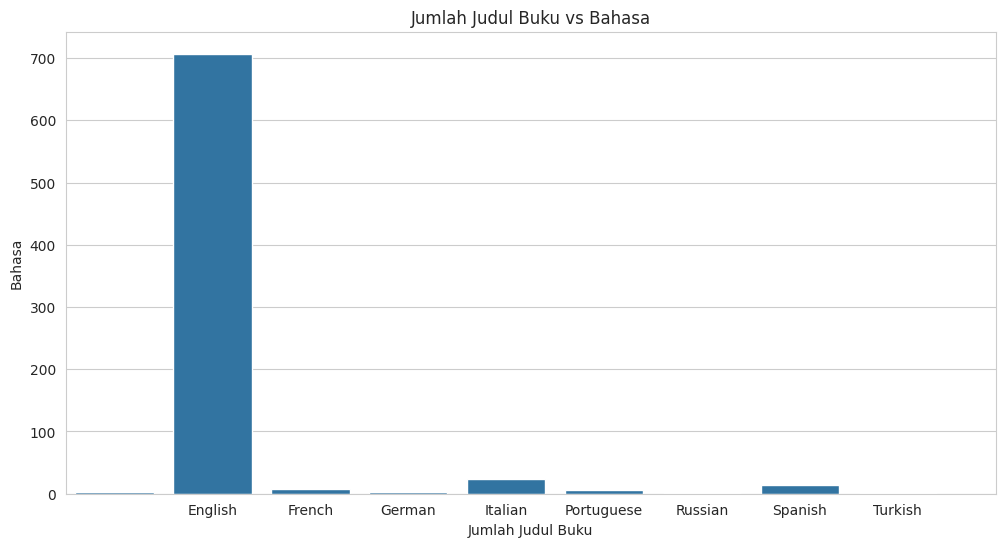

In [21]:
# Melihat Sebaran Jumlah Buku berdasar Bahasa nya
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
language1 = data_book1.groupby('language')['bookId'].count()
sns.barplot(x=language1.index, y=language1.values)
plt.title('Jumlah Judul Buku vs Bahasa')
plt.xlabel('Jumlah Judul Buku')
plt.ylabel('Bahasa')
plt.xticks(range(1, 10))
plt.show()

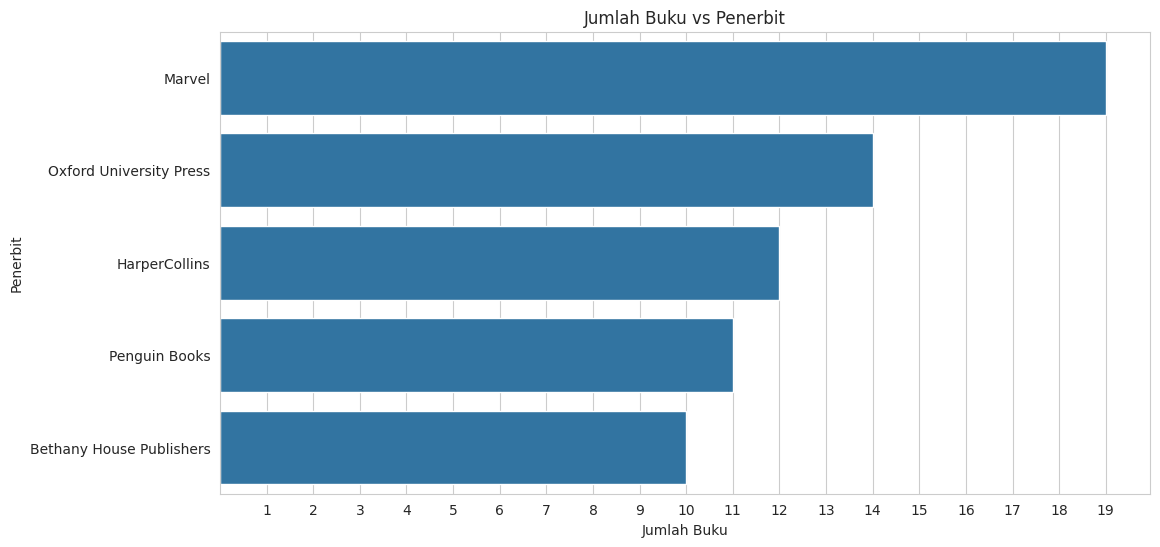

In [22]:
# Melihat sebaran Jumlah Buku berdasar TOP 5 Penerbit nya
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
jumlah_buku = data_book1.groupby('publisher')['bookId'].count().nlargest(5)
sns.barplot(y=jumlah_buku.index, x=jumlah_buku.values)
plt.title('Jumlah Buku vs Penerbit')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penerbit')
plt.xticks(range(1, 20))
plt.show()

In [23]:
# Mengecek Judul-judul Buku berdasar Bahasa nya
data_book1[data_book1['language'] == 'German']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
7382,238953.Das_Kapital,Das Kapital,Capital #1-3,"Karl Marx, Friedrich Engels (Editor), Serge L....",3.86,"Das Kapital, Karl Marx's seminal work, is the ...",German,9.7809E+12,"['Philosophy', 'Economics', 'Politics', 'Nonfi...",[],...,10/28/1967,[],8160,"['3026', '2419', '1710', '570', '435']",88.0,[],https://i.gr-assets.com/images/S/compressed.ph...,363,4,5.78
12739,18631820-g-ttlich-trilogie,Göttlich-Trilogie,Starcrossed #1-3,"Josephine Angelini (Goodreads Author), Simone ...",4.40,"Sobald die 16-jährige Helen auf Lucas trifft, ...",German,9.78379E+12,"['Fantasy', 'Romance', 'Young Adult']",[],...,9/27/2013,[],850,"['482', '263', '75', '23', '7']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,190,2,26.52
33174,1696295.Im_Land_der_wei_en_Wolke,Im Land der weißen Wolke,Neuseeland-Saga #1,Sarah Lark,4.02,"London, 1852: Zwei junge Frauen treten die Rei...",German,9.7834E+12,"['Historical Fiction', 'Romance', 'Historical'...",[],...,11/6/2007,[],14483,"['5381', '5326', '2770', '713', '293']",93.0,['New Zealand'],https://i.gr-assets.com/images/S/compressed.ph...,92,1,3.57


- Exploratory Data Analysis
Dengan mengikuti tahapan data preparation ini, kami dapat memastikan bahwa data yang digunakan dalam analisis dan model rekomendasi adalah data yang berkualitas dan siap digunakan.

Metode yang dipakai adalah Content Based Filtering

- Cosine Similarity Cosine Similarity adalah metrik yang digunakan untuk mengukur seberapa mirip dua vektor dalam ruang multidimensi. Dalam konteks sistem rekomendasi, cosine similarity sering digunakan untuk menentukan kesamaan antara item (seperti produk) berdasarkan fitur-fitur yang dimiliki. Metrik ini sangat berguna dalam pendekatan Collaborative Filtering dan Content-Based Filtering.

- Nilai cosine similarity berkisar antara -1 hingga 1:
1 menunjukkan bahwa dua vektor identik (sama arah). 0 menunjukkan bahwa dua vektor tidak memiliki kesamaan (tegak lurus). -1 menunjukkan bahwa dua vektor berlawanan arah.

- Berdasarkan perhitungan tf-idf matrix didapatkan hasil pasangan tile (Judul Buku) terhadap language (Bahasa) yang digunakan.

- Lalu kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya sehingga menghasilkan kesamaan (similarity) antar title (Judul Buku). Terlihat sebagian besar buku memiliki kesamaan, hanya buku paling kiri tidak. Sebab paling kiri adalah buku Italia.

# **MODEL DEVELOPMENT**

# **Content Based Filtering**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan 'Author'
tf.fit(data_book1['language'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['dutch', 'english', 'french', 'german', 'italian', 'portuguese',
       'russian', 'spanish', 'turkish'], dtype=object)

In [25]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_book1['language'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(764, 9)

In [26]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan Bahasa
# Baris diisi dengan Judul Buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_book1.title
).sample(9, axis=1).sample(8, axis=0)

,english,dutch,italian,spanish,russian,french,german,portuguese,turkish
title,,,,,,,,,
An Echo in the Bone,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sabriel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daredevil: Born Again,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Rising,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chronicles of the Black Company,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Im Land der weißen Wolke,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"Fushigi Yûgi: The Mysterious Play, Vol. 1: Priestess",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yankee Bride/Rebel Bride,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa Judul Buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_book1['title'], columns=data_book1['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (764, 764)


title,Finché amore non ci separi,Love Takes Wing,Twenty Thousand Leagues Under the Sea,I love Chanel,"Bone, Vol. 3: Eyes of the Storm"
title,,,,,
Sunrise at Sunset,0.0,1.0,1.0,0.0,1.0
The Devil's Son,0.0,1.0,1.0,0.0,1.0
Le Fléau 1/2,0.0,0.0,0.0,0.0,0.0
Enlightened,0.0,1.0,1.0,0.0,1.0
Delta Green,0.0,1.0,1.0,0.0,1.0
Fifty Shades Darker,0.0,1.0,1.0,0.0,1.0
Thereby Hangs a Tail,0.0,1.0,1.0,0.0,1.0
After We Collided,0.0,1.0,1.0,0.0,1.0
The Blue Sword,0.0,1.0,1.0,0.0,1.0


In [30]:
def book_recommendations(title_mirip, similarity_data=cosine_sim_df, items=data_book1[['title','language']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title_mirip].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title_mirip, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [31]:
data_book1[data_book1.title.eq('Eugénie Grandet')]

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
5777,59142.Eug_nie_Grandet,Eugénie Grandet,La Comédie Humaine #30,"Honoré de Balzac, Sylvia Raphael (Translator),...",3.8,"""Who is going to marry Eugenie Grandet?""This i...",English,9.78019E+12,"['Classics', 'Fiction', 'France', 'French Lite...","['Eugénie Grandet', 'Félix Grandet', 'Charles ...",...,10/28/1933,[],17727,"['4610', '6807', '4752', '1235', '323']",91.0,"['Saumur (France)', 'France']",https://i.gr-assets.com/images/S/compressed.ph...,489,8,6.28


- Berdasarkan perhitungan tf-idf matrix didapatkan hasil pasangan tile (Judul Buku) terhadap language (Bahasa) yang digunakan dihasilkan tabel pasangan judul buku berbahasa Inggris dengan judul buku lain yang berbahasa Inggris memiliki nilai 1 yang berarti dalam satu kelompok.
Hal yang sama terjadi pada buku-buku berbahasa lain sesuai kelompok nya.

- Lalu kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya sehingga menghasilkan kesamaan (similarity) antar title (Judul Buku). Terlihat sebagian besar buku memiliki kesamaan dalam Bahasa Inggris, hanya buku paling kiri tidak. Sebab paling kiri adalah buku Italia.
Sisanya judul buku berbahasa lain berlaku hal yang sama, hanya tidak terlihat di screen ini.

# **EVALUATION**

In [45]:
# Mendapatkan rekomendasi title yang mirip dengan title tsb
book_recommendations("Deuil", cosine_sim_df, data_book1[['title', 'language']], k=5)

,title,language
0,Le Fléau 1/2,French
1,Incendies,French
2,Le hussard sur le toit,French
3,La Bête humaine,French
4,Le clan des MacLaren,French


In [49]:
# Mendapatkan rekomendasi title yang mirip dengan title tsb
book_recommendations("Eugénie Grandet", cosine_sim_df, data_book1[['title', 'language']], k=10)

,title,language
0,Dracula the Un-Dead,English
1,Ember,English
2,Forbidden,English
3,A Murder Is Announced,English
4,Twenty Years After,English
5,The Iron-Jawed Boy and the Hand of the Moon,English
6,Strawberry Girl,English
7,Love's Enduring Promise,English
8,Rumors,English
9,Day Watch,English


- Pada bagian EVALUASI ini, kita akan mencoba menanyakan rekomendasi 5 buah judul yang mirip dengan title yang kita ketik misalnya "Eugénie Grandet" berbahasa Inggris sbb: Terlihat hasilnya sudah sesuai sepertu yang diharapkan.

Dari sini dapat disimpulkan sbb:
- Model Content Based Filtering yang dipakai sudah menghasilkan seperti yang diharapkan, karena hasil evaluasi menghasilkan output yang sesuai. Baik itu saat diminta memberikan 5 buah ataupun 10 buah rekomendasi.
- Sehingga ini mencapai goal yang diharapkan, dimana menjawab permasalahan:
  - Memberi rekomendasi buku yang akurat
  - Dapat mengelola database koleksi buku yang banyak secara optimal